In [1]:
library('mlbench')
library(arules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
selection = read.csv('selectionDF.csv', header = TRUE)

In [3]:
head(selection)

ID,age,class_worker,det_ind_code,det_occ_code,wage_per_hour,marital_stat,major_ind_code,major_occ_code,race,...,tax_filer_stat,num_emp,fam_under_18,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,income_50k,graduated
67087,15,Private,33,29,0,Never married,Retail trade,Other service,White,...,Nonfiler,3,Both parents present,Native- Born in the United States,0,Not in universe,2,20,-50000,no
60496,34,Not in universe,0,0,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Joint both under 65,6,Not in universe,Native- Born in the United States,2,Not in universe,2,52,-50000,no
32501,27,Private,33,35,0,Never married,Retail trade,Precision production craft & repair,White,...,Head of household,1,Not in universe,Foreign born- Not a citizen of U S,0,Not in universe,2,52,-50000,no
12944,76,Not in universe,0,0,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Nonfiler,0,Not in universe,Native- Born in the United States,0,Not in universe,2,0,-50000,no
148401,62,Not in universe,0,0,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Joint one under 65 & one 65+,0,Not in universe,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,-50000,no
24228,4,Not in universe,0,0,0,Never married,Not in universe or children,Not in universe,White,...,Nonfiler,0,Both parents present,Native- Born in the United States,0,Not in universe,0,0,-50000,no


In [4]:
library(dplyr)
library(stringr)
library(magrittr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
selection$age = as.factor(selection$age)
selection$ID = as.factor(selection$ID)
selection$det_ind_code = as.factor(selection$det_ind_code)
selection$det_occ_code = as.factor(selection$det_occ_code)
selection$wage_per_hour = as.factor(selection$wage_per_hour)
selection$capital_gains = as.factor(selection$capital_gains)
selection$capital_losses = as.factor(selection$capital_losses)
selection$stock_dividends = as.factor(selection$stock_dividends)
selection$num_emp = as.factor(selection$num_emp)
selection$own_or_self = as.factor(selection$own_or_self)
selection$vet_benefits = as.factor(selection$vet_benefits)
selection$weeks_worked = as.factor(selection$weeks_worked)




In [6]:
isets = apriori(selection, parameter = list(target ="frequent", support = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10475 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[21903 item(s), 20950 transaction(s)] done [0.21s].
sorting and recoding items ... [22 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(selection, parameter = list(target = "frequent", support = 0.5)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”

 done [0.08s].
writing ... [10265 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [7]:
isets = sort(isets, by="support")
inspect(head(isets, n = 10))
length(isets)

     items                             support count
[1]  {vet_question= Not in universe} 0.9911217 20764
[2]  {capital_losses=0}              0.9795704 20522
[3]  {capital_losses=0,                             
      vet_question= Not in universe} 0.9708831 20340
[4]  {unemp_reason= Not in universe} 0.9691169 20303
[5]  {capital_gains=0}               0.9611456 20136
[6]  {unemp_reason= Not in universe,                
      vet_question= Not in universe} 0.9605251 20123
[7]  {capital_gains=0,                              
      vet_question= Not in universe} 0.9529356 19964
[8]  {unemp_reason= Not in universe,                
      capital_losses=0}              0.9492601 19887
[9]  {wage_per_hour=0}               0.9435322 19767
[10] {unemp_reason= Not in universe,                
      capital_losses=0,                             
      vet_question= Not in universe} 0.9408592 19711


[1] 10265

In [8]:
is_max = isets[is.maximal(isets)]
inspect(head(sort(is_max, by = "support")))
length(is_max)

    items                                              support count
[1] {wage_per_hour=0,                                               
     union_member= Not in universe,                                 
     unemp_reason= Not in universe,                                 
     capital_gains=0,                                               
     capital_losses=0,                                              
     stock_dividends=0,                                             
     own_or_self=0,                                                 
     vet_question= Not in universe,                                 
     income_50k=-50000,                                             
     graduated=no}                                   0.6152267 12889
[2] {wage_per_hour=0,                                               
     union_member= Not in universe,                                 
     unemp_reason= Not in universe,                                 
     capital_gains=0,             

[1] 521

In [9]:
rules = apriori(selection, parameter = list(support = 0.5, confidence = 0.9))

inspect(head(rules, n = 10))

#print the quality of the measures
quality(head(rules))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10475 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[21903 item(s), 20950 transaction(s)] done [0.20s].
sorting and recoding items ... [22 item(s)] done [0.01s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(selection, parameter = list(support = 0.5, confidence = 0.9)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”

 done [0.10s].
writing ... [43475 rule(s)] done [0.01s].
creating S4 object  ... done [0.03s].
     lhs                                rhs                            
[1]  {}                              => {own_or_self=0}                
[2]  {}                              => {union_member= Not in universe}
[3]  {}                              => {income_50k=-50000}            
[4]  {}                              => {wage_per_hour=0}              
[5]  {}                              => {capital_gains=0}              
[6]  {}                              => {unemp_reason= Not in universe}
[7]  {}                              => {capital_losses=0}             
[8]  {}                              => {vet_question= Not in universe}
[9]  {class_worker= Not in universe} => {det_ind_code=0}               
[10] {det_ind_code=0}                => {class_worker= Not in universe}
     support   confidence lift     count
[1]  0.9048210 0.9048210  1.000000 18956
[2]  0.9050119 0.9050119  1.000

support,confidence,lift,count
0.9048210,0.9048210,1,18956
0.9050119,0.9050119,1,18960
0.9354654,0.9354654,1,19598
0.9435322,0.9435322,1,19767
0.9611456,0.9611456,1,20136
0.9691169,0.9691169,1,20303


In [10]:
# sort out the rules and print additional "interest" measures
#defaultW = getOption("warn")
#options(warn = -1)

#rules = sort(rules, by="lift")
#inspect(head(rules, n=10))
#interestMeasure(rules[1:10], method=c("phi", "gini"), trans=trans)

#options(warn = defaultW)

Loading required package: grid
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


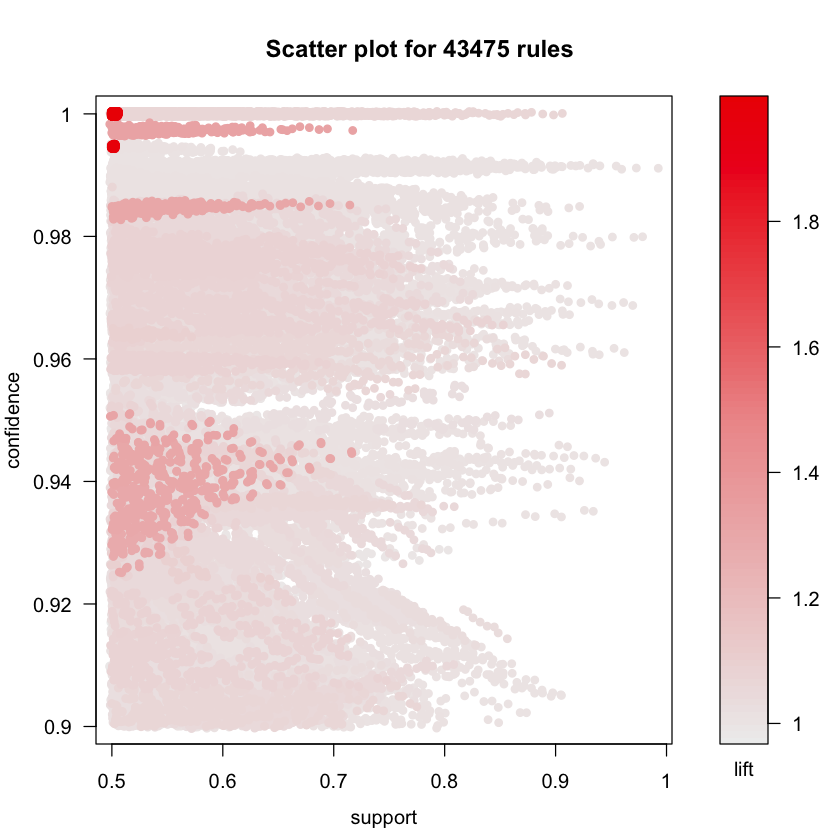

In [11]:
library(arulesViz)
plot(rules)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 43475

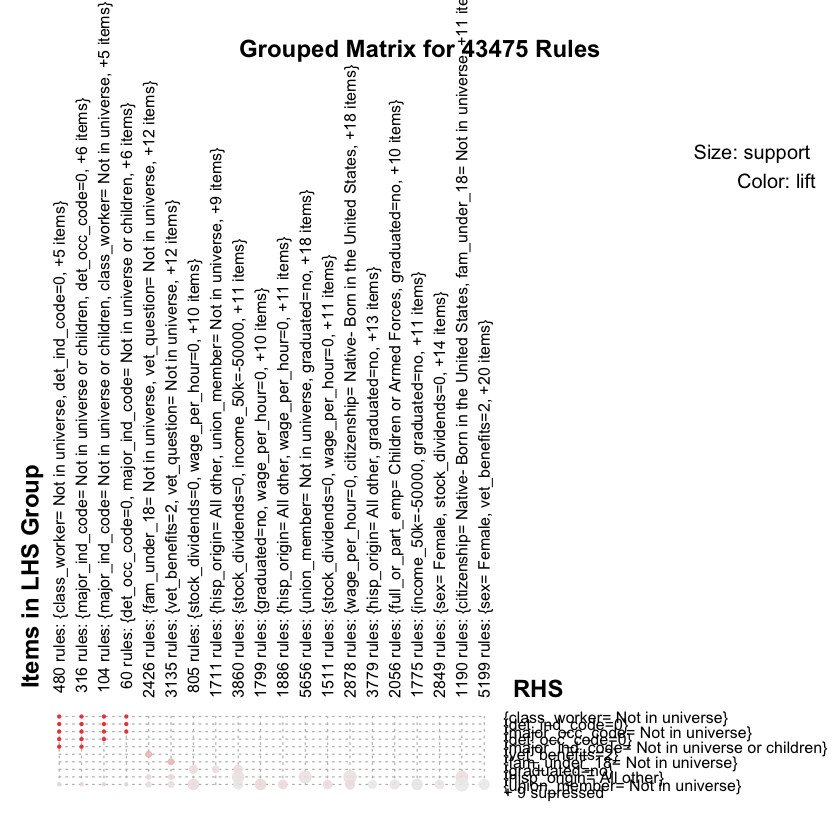

In [12]:
# a great plot
plot(rules, method="grouped")
inspect(rules)
length(rules)